In [1]:
# 標準化を行う関数
def standardize(x):
    # 標準化を行う
    # パラメーターx : 標準化前のx
    x_mean = x.mean()                 # 平均値を求める
    std = x.std()                     # 標準偏差を求める    
    return (x - x_mean)/std          # 標準化した値を返す

In [2]:
# 訓練データを読み込んでxを標準化する
import numpy as np                   # NumPyをインポート

data = np.loadtxt(fname='sales.csv',  # 読み込むファイル
                  dtype='int',        # データ型を指定
                  delimiter=',',      # 区切り文字を指定
                  skiprows=1          # 1行目のタイトルを読み飛ばす
                  )
train_x = data[:,0]                   # 1列目のデータをxに代入
train_y = data[:,1]                   # 2列目のデータをyに代入
train_x_std = standardize(train_x)    # train_xを標準化
train_y_std = standardize(train_y)    # train_yを標準化

In [3]:
import tensorflow as tf

b = tf.Variable(0.)  # バイアスbを保持するVariableオブジェクト
w1 = tf.Variable(0.) # 重みw1を保持するVariableオブジェクト
w2 = tf.Variable(0.) # 重みw2を保持するVariableオブジェクト
w3 = tf.Variable(0.) # 重みw3を保持するVariableオブジェクト
w4 = tf.Variable(0.) # 重みw4を保持するVariableオブジェクト

In [4]:
def model(x):
    ''' 多項式回帰モデル
    
    '''   
    y = b + w1*x + w2*pow(x, 2) + w3*pow(x, 3) + w4*pow(x, 4)
    return y

In [5]:
def loss(y_pred, y_true):
    '''MSE(平均二乗誤差)
    
    Parameters:
      y_pred(ndarray): 予測値
      y_true(ndarray): 正解値
    '''
    return tf.math.reduce_mean(tf.math.square(y_pred - y_true))

In [6]:
learning_rate = 0.01 # 学習率を設定
epochs = 200         # 学習回数

for i in range(epochs):
    # 自動微分による勾配計算を記録するブロック
    with tf.GradientTape() as tape:
        y_pred = model(train_x_std)
        tmp_loss = loss(y_pred, train_y_std)
    # tapeに記録された操作を使用して誤差の勾配を計算
    gradients = tape.gradient(tmp_loss, [b, w1, w2, w3, w4])
    # 勾配降下法の更新式を適用してパラメーター値を更新
    b.assign_sub(learning_rate * gradients[0])
    w1.assign_sub(learning_rate * gradients[1])
    w2.assign_sub(learning_rate * gradients[2])
    w3.assign_sub(learning_rate * gradients[3])
    w4.assign_sub(learning_rate * gradients[4])

    # 学習50回ごとに結果を出力
    if (i + 1) % 50 == 0:
        # 処理回数とa、bの値を出力
        print('Step:{}\n a1 = {} a2 = {}\n a3 = {} a4 = {}\n b = {}'.format(
            i + 1,      # 学習回数
            w1.numpy(), # a1をndarrayに変換
            w2.numpy(), # a2をndarrayに変換
            w3.numpy(), # a3をndarrayに変換
            w4.numpy(), # a4をndarrayに変換
            b.numpy())  # bをndarrayに変換
             )
        # 損失を出力
        print(' Loss = {}'.format(tmp_loss))

Step:50
 a1 = 0.2685434818267822 a2 = 0.02827165275812149
 a3 = 0.250828355550766 a4 = 0.028520546853542328
 b = -0.04034848138689995
 Loss = 0.17421622574329376
Step:100
 a1 = 0.3970474302768707 a2 = 0.05889112502336502
 a3 = 0.20271700620651245 a4 = 0.024918755516409874
 b = -0.07001537829637527
 Loss = 0.13260361552238464
Step:150
 a1 = 0.5059216618537903 a2 = 0.08497073501348495
 a3 = 0.16168782114982605 a4 = 0.021987423300743103
 b = -0.09625568985939026
 Loss = 0.10256266593933105
Step:200
 a1 = 0.598282516002655 a2 = 0.10732477158308029
 a3 = 0.12687326967716217 a4 = 0.019497673958539963
 b = -0.11907879263162613
 Loss = 0.080870620906353


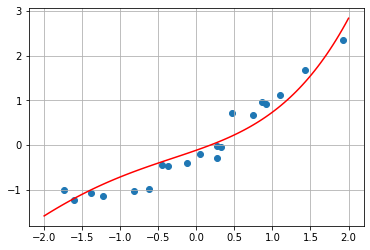

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# train_x_stdとtrain_y_stdが交差するポイントをプロット
plt.scatter(train_x_std, train_y_std)
# x軸の値として-3から3までの等差数列を生成
x_axis = np.linspace(start=-2,    # 数列の始点
                     stop=2,      # 数列の終点
                     num=100      # 等差数列の要素数
                     )

# 更新されたバイアスと重みをモデルに当てはめる
y_learned = b + w1*x_axis + w2*pow(x_axis, 2) + \
                w3*pow(x_axis, 3) + w4*pow(x_axis, 4)

plt.plot(x_axis,  y_learned, 'r')
plt.grid(True)
plt.show()